<a href="https://colab.research.google.com/github/4m-world/p/blob/main/2021_07_31_Lesson6_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<!--NAVIGATION-->


<a href="https://colab.research.google.com/github/smabb/p/blob/master/Lesson6 Pandas.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>

|                                        -                                        |                                        -                                        |                                        -                                        |
|---------------------------------------------------------------------------------|---------------------------------------------------------------------------------|---------------------------------------------------------------------------------|
|          [Exercise 1 (read series)](<#Exercise-1-(read-series&#41;>)          | [Exercise 2 (operations on series)](<#Exercise-2-(operations-on-series&#41;>) |       [Exercise 3 (inverse series)](<#Exercise-3-(inverse-series&#41;>)    |
|       [Exercise 4 (cities)](<#Exercise-4-(cities&#41;>)                    |          [Exercise 5 (powers of series)](<#Exercise-5-(powers-of-series&#41;>) |    [[Exercise 6 (municipalities)](<#Exercise-6-(municipalities-of-finland&#41;>)    |
|       [Exercise 7 (swedish and foreigners)](<#Exercise-7-(swedish-and-foreigners&#41;>)    |    [Exercise 8 (growing municipalities)](<#Exercise-8-(growing-municipalities&#41;>)       |   [Exercise 9 (subsetting with loc)](<#Exercise-9-(subsetting-with-loc&#41;>)    |
|       [Exercise 10 (subsetting by positions)](<#Exercise-`0-(subsetting-by-positions&#41;>)   |                [Exercise 11 (snow depth)](<#Exercise-11-(snow-depth&#41;>)                |
|      [Exercise 12 (average temperature)](<#Exercise-10-(average-temperature&#41;>)      |               [Exercise 13 (below zero)](<#Exercise-13-(below-zero&#41;>)               |                 [Exercise 14 (cyclists)](<#Exercise-14-(cyclists&#41;>)                 |
|      [Exercise 15 (missing value types)](<#Exercise-15-(missing-value-types&#41;>)      |   [Exercise 16 (special missing values)](<#Exercise-16-(special-missing-values&#41;>)   |                [Exercise 17 (last week)](<#Exercise-17-(last-week&#41;>)                |
|               [Exercise 18 (split date)](<#Exercise-18-(split-date&#41;>)               | [Exercise 19 (split date continues)](<#Exercise-19-(split-date-continues&#41;>)                |
|      [Exercise 20 (cycling weather)](<#Exercise-20-(cycling-weather&#41;>)     |  [Exercise 21 (cyclists per day)](<#Exercise-21-(cyclists-per-day&#41;>)     |  [Exercise 22 (best performer)](<#Exercise-22-(best-performer&#41;>)                |
|      [Exercise 23 (bicycle timeseries)](<#Exercise-23-(bicycle-timeseries&#41;>)     |  [Exercise 24 (commute)](<#Exercise-24-(commute&#41;>)              |



# Pandas

In the NumPy section we dealt with some arrays, whose columns had each a special meaning. For example, the column number 0 could contain values interpreted as years, and column 1 could contain a month, and so on. It is possible to handle the data this way, but in can be hard to remember, which column number corresponds to which variable. Especially, if you later remove some column from the array, then the numbering of the remaining columns changes. One solution to this is to give a descriptive name to each column. These column names stay fixed and attached to their corresponding columns, even if we remove some of the columns. In addition, the rows can be given names as well, these are called *indices* in Pandas.

The [Pandas](http://pandas.pydata.org/) library is built on top of the NumPy library, and it provides a special kind of two dimensional data structure called `DataFrame`. The `DataFrame` allows to give names to the columns, so that one can access a column using its name in place of the index of the column.

First we will quickly go through a few examples to see what is possible with Pandas. You may need to check some details from the Pandas [documentation](http://pandas.pydata.org/pandas-docs/stable/) in order to complete the exercises. We start by doing some standard imports:

In [2]:
import pandas as pd    # This is the standard way of importing the Pandas library
import numpy as np

Let's import some weather data that is in text form in a csv (Commma Separated Values) file. The following call will fetch the data from the internet and convert it to a DataFrame:

In [3]:
wh = pd.read_csv("https://raw.githubusercontent.com/smabb/p/master/data/temp.csv")
   

We see that the DataFrame contains eight columns, three of which are actual measured variables. Now we can refer to a column by its name:

In [4]:
wh.head(10)

,Year,m,d,Time,Time zone,Precipitation amount (mm),Snow depth (cm),Air temperature (degC)
0,2017,1,1,00:00,UTC,-1.0,-1.0,0.6
1,2017,1,2,00:00,UTC,4.4,-1.0,-3.9
2,2017,1,3,00:00,UTC,6.6,7.0,-6.5
3,2017,1,4,00:00,UTC,-1.0,13.0,-12.8
4,2017,1,5,00:00,UTC,-1.0,10.0,-17.8
5,2017,1,6,00:00,UTC,0.3,10.0,-17.8
6,2017,1,7,00:00,UTC,5.3,10.0,-3.8
7,2017,1,8,00:00,UTC,-1.0,12.0,-0.5
8,2017,1,9,00:00,UTC,1.1,12.0,0.5
9,2017,1,10,00:00,UTC,0.3,9.0,1.7


There are several summary statistic methods that operate on a column or on all the columns. The next example computes the mean of the temperatures over all rows of the DataFrame:

In [5]:
  # Mean temperature
  wh.mean()

Year                         2017.000000
m                               6.526027
d                              15.720548
Precipitation amount (mm)       1.966301
Snow depth (cm)                 0.966480
Air temperature (degC)          6.527123
dtype: float64

We can drop some columns from the DataFrame with the `drop` method:

In [6]:
 # Return a copy with one column removed, the original DataFrame stays intact
 wh.drop(['Time', 'Time zone'], axis=1)

,Year,m,d,Precipitation amount (mm),Snow depth (cm),Air temperature (degC)
0,2017,1,1,-1.0,-1.0,0.6
1,2017,1,2,4.4,-1.0,-3.9
2,2017,1,3,6.6,7.0,-6.5
3,2017,1,4,-1.0,13.0,-12.8
4,2017,1,5,-1.0,10.0,-17.8
...,...,...,...,...,...,...
360,2017,12,27,1.1,-1.0,3.8
361,2017,12,28,3.7,-1.0,2.8
362,2017,12,29,7.8,-1.0,3.8
363,2017,12,30,4.1,-1.0,2.5


In [7]:
wh.head()     # Original DataFrame is unchanged

,Year,m,d,Time,Time zone,Precipitation amount (mm),Snow depth (cm),Air temperature (degC)
0,2017,1,1,00:00,UTC,-1.0,-1.0,0.6
1,2017,1,2,00:00,UTC,4.4,-1.0,-3.9
2,2017,1,3,00:00,UTC,6.6,7.0,-6.5
3,2017,1,4,00:00,UTC,-1.0,13.0,-12.8
4,2017,1,5,00:00,UTC,-1.0,10.0,-17.8


In case you want to modify the original DataFrame, you can either assign the result to the original DataFrame, or use the `inplace` parameter of the `drop` method. Many of the modifying methods of the DataFrame have the `inplace` parameter.

Addition of a new column works like adding a new key-value pair to a dictionary:

In [8]:
wh['Rainy'] = wh['Precipitation amount (mm)'] > 5
wh.head()

,Year,m,d,Time,Time zone,Precipitation amount (mm),Snow depth (cm),Air temperature (degC),Rainy
0,2017,1,1,00:00,UTC,-1.0,-1.0,0.6,False
1,2017,1,2,00:00,UTC,4.4,-1.0,-3.9,False
2,2017,1,3,00:00,UTC,6.6,7.0,-6.5,True
3,2017,1,4,00:00,UTC,-1.0,13.0,-12.8,False
4,2017,1,5,00:00,UTC,-1.0,10.0,-17.8,False


In the next sections we will systematically go through the DataFrame and its one-dimensional version: *Series*.

## Creation and indexing of series

One can turn any one-dimensional iterable into a Series, which is a one-dimensional data structure:

In [9]:
s=pd.Series([1, 4, 5, 2, 5, 2])
s

0    1
1    4
2    5
3    2
4    5
5    2
dtype: int64

The data type of the elements in this Series is `int64`, integers representable in 64 bits. 

We can also attach a name to this series:

In [10]:
s.name = 'Grades'

The common attributes of the series are the `name`, `dtype`, and `size`:

In [11]:
print(f"Name: {s.name}, dtype: {s.dtype}, size: {s.size}")

Name: Grades, dtype: int64, size: 6


In addition to the values of the series, also the row indices were printed. All the accessing methods from NumPy arrays also work for the Series: indexing, slicing, masking and fancy indexing. 

In [12]:
s[1]

4

In [13]:
s[[0,5]]

0    1
5    2
Name: Grades, dtype: int64

In [14]:
t = s[-2:]
t

4    5
5    2
Name: Grades, dtype: int64

Note that the indices stick to the corresponding values, they are not renumbered!

In [15]:
t[4]                

5

The values as a NumPy array are accessible via the `values` attribute:

In [16]:
s2.values

NameError: ignored

And the indices are available through the `index` attribute:

In [ ]:
s2.index

The index is not simply a NumPy array, but a data structure that allows fast access to the elements. The indices need not be integers, as the next example shows:

In [ ]:
s3=pd.Series([1, 4, 5, 2, 5, 2], index=list("abcdef"))
s3

In [ ]:
s3.index

In [ ]:
s3["b"]

<div class="alert alert-warning">
Note a special case here: if the indices are not integers, then the last index of the slice is included in the result. This is contrary to slicing with integers!
</div>

In [ ]:
s3["b":"e"]

It is still possible to access the series using NumPy style *implicit integer indices*:

In [ ]:
s3[0]

This can be confusing though. Consider the following series:

In [ ]:
s4 = pd.Series(["Jack", "Jones", "James"], index=[1,2,3])
s4

What do you think `s4[1]` will print? For this ambiguity Pandas offers attributes `loc` and `iloc`. The attributes `loc` always uses the explicit index, while the attribute `iloc` always uses the implicit integer index:

In [ ]:
print(s4[1])
print(s4.loc[1], s4.iloc[1])


#### <div class="alert alert-info">Exercise 1 (read series)</div>

Write function `read_series` that reads input lines from the user and return a Series. Each line should contain first the index and then the corresponding value, separated by whitespace. The index and values are strings (in this case `dtype` is `object`). An empty line signals the end of Series. Malformed input should cause an exception. An input line is malformed, if it is empty and, when split at whitespace, does not result in two parts.

In [ ]:
def read_series():
  '''reads input lines from the user and return a Series'''

  values = []
  indexes = []
  
  while True:
    data = input('Input: ')

    if len(data) == 0:
      break
    
    splitted = data.split()
    if len(splitted) < 2:
      print('Invlaid input, input must consist from at least two parts.')
      break;
    
    indexes.append(splitted[0])
    values.append("".join(splitted[1:]))
  
  return pd.Series(values, index = indexes)

help(read_series)
series = read_series()

print(series)

#### <div class="alert alert-info">Exercise 2 (operations on series)</div>

Write function `create_series` that gets two lists of numbers as parameters. Both lists should have length 3.
The function should first create two Series, `s1` and `s2`. The first series should have values from the first parameter list and have corresponding indices `a`, `b`, and  `c`. The second series should get its values from the second parameter list and have again the corresponding indices `a`, `b`, and  `c`. The function should return the pair of these Series.

Then, write a function `modify_series` that gets two Series as parameters. It should add to the first Series `s1` a new value with index `d`. The new value should be the same as the value in Series `s2` with index `b`.
Then delete the element from `s2` that has index `b`. Now the first Series should have four values, while the second list has only two values. Adding a new element to a Series can be achieved by assignment, like with dictionaries. Deletion of an element from a Series can be done with the `del` statement.

Try adding together the Series returned by the `modify_series` function. The operations on Series use the indices to keep the element-wise operations *aligned*. If for some index the operation could not be performed, the resulting value will be `NaN` (Not A Number).

<hr/>

In [ ]:
def create_series(l1, l2):
  '''reate two Series, s1 and s2'''
  if len(l1) != 3: pass
  if len(l2) != 3: pass
  indexes = ['a', 'b', 'c']
  s1 = pd.Series(l1, index=indexes)
  s2 = pd.Series(l2, index=indexes)

  return (s1, s2)
def modify_series(s1, s2):
  s_1 = s1.copy()
  s_2 = s2.copy()

  s_1['d'] = s2['b']
  del s_2['b']
  return (s_1, s_2)
l1 = [1, 2, 3]
l2 = [4, 5, 6]
s1, s2 = create_series(l1, l2)
s1m, s2m = modify_series(s1, s2)

print(s1, s2, s1m, s2m, sep= '\n' + '-'*15 + '\n')


#### <div class="alert alert-info">Exercise 3 (inverse series)</div>

Write function `inverse_series` that get a Series as a parameter and returns a new series, whose indices and values have swapped roles. 

What happens if some value appears multiple times in the original Series? What happens if you use this value to index the resulting Series?
<hr/>

In [ ]:
def inverse_series(s1):
  return pd.Series(s1.index.values, s1.values)

series = pd.Series(['a','b','c'])
print(series)
print(inverse_series(series))

One may notice that there are similarities between Python's dictionaries and Pandas' Series, both can be thought to access values using keys. 

As a mark of the similaries between these two data structures, Pandas allows creation of a `Series` object from a dictionary:

In [ ]:
d = { 2001 : "Bush", 2005: "Bush", 2009: "Obama", 2013: "Obama", 2017 : "Trump"}
s4 = pd.Series(d)
s4

# Pandas (continues)

In [ ]:
import pandas as pd
import numpy as np

## Creation of dataframes

The DataFrame is essentially a two dimensional object, and it can be created in three different ways:

* out of a two dimensional NumPy array
* out of given columns
* out of given rows

### Creating DataFrames from a NumPy array

In the following example a DataFrame with 2 rows and 3 column is created. The row and column indices are given explicitly.

In [ ]:
df = pd.DataFrame(np.random.randn(2, 3), columns=['first', 'second', 'third'], index=['a', 'b'])
df

Note that now both the rows and columns can be accessed using the special `Index` object:

In [ ]:
df.index                            # These are the "row names"

In [ ]:
df.columns                          # These are the "column names"

If either `columns` or `index` argument is left out, then an implicit integer index will be used:

In [ ]:
df2=pd.DataFrame(np.random.randn(2,3), index=["a", "b"])
df2

Now the column index is an object similar to Python's builtin `range` type:

In [ ]:
df2.columns

### Creating DataFrames from columns

A column can be specified as a list, an NumPy array, or a Pandas' Series. The names of the columns can be given either with the `columns` parameter, or if Series objects are used, then the `name` attribute of each Series is used as the column name.

In [ ]:
s1 = pd.Series([1,2,3])
s1

In [ ]:
s2 = pd.Series([4,5,6], name="b")
s2

Give the column name explicitly:

In [ ]:
pd.DataFrame(s1, columns=["a"])

Use the `name` attribute of Series s2 as the column name:

In [ ]:
pd.DataFrame(s2)

If using multiple columns, then they must be given as the dictionary, whose keys give the column names and values are the actual column content.

In [ ]:
pd.DataFrame({"a": s1, "b": s2})


### Creating DataFrames from rows

We can give a list of rows as a parameter to the DataFrame constructor. Each row is given as a dict, list, Series, or NumPy array. If we want to give names for the columns, then either the rows must be dictionaries, where the key is the column name and the values are the elements of the DataFrame on that row and column, or else the column names must be given explicitly. An example of this:

In [ ]:
df=pd.DataFrame([{"Wage" : 1000, "Name" : "Jack", "Age" : 21}, {"Wage" : 1500, "Name" : "John", "Age" : 29}])
df

Or:

In [ ]:
df = pd.DataFrame([[1000, "Jack", 21], [1500, "John", 29]], columns=["Wage", "Name", "Age"])
df



Write function `cities` that returns the following DataFrame of top  cities by population:

```
                 Population Total area
Helsinki         643272     715.48
Espoo            279044     528.03
Tampere          231853     689.59
Vantaa           223027     240.35
Oulu             201810     3817.52
```

<hr/>

In [ ]:
def cities():
  indexes = ['Helsinki', 'Espoo', 'Tampere', 'Vantaa', 'Oulu']
  data = [
          {'Population': 643272, 'Total area': 715.48},
          {'Population': 279044, 'Total area': 528.03},
          {'Population': 231853, 'Total area': 689.59},
          {'Population': 223027, 'Total area': 240.35},
          {'Population': 201810, 'Total area': 3817.52}
        ]
  return pd.DataFrame(data, index=indexes)

print(cities()) 

#### <div class="alert alert-info">Exercise 5 (powers of series)</div>

Make function `powers_of_series` that takes a Series and a positive integer `k` as parameters and returns a DataFrame. The resulting DataFrame should have the same index as the input Series. The first column of the dataFrame should be the input Series, the second column should contain the Series raised to power of two. The third column should contain the Series raised to the power of three, and so on until (and including) power of `k`. The columns should have indices from 1 to k.

The values should be numbers, but the index can have any type.
. Example of usage:

```
s = pd.Series([1,2,3,4], index=list("abcd"))
print(powers_of_series(s, 3))
```
Should print:
```
   1   2   3
a  1   1   1
b  2   4   8
c  3   9  27
d  4  16  64
```


<hr/>

In [ ]:
def powers_of_series(s, k):
  if k < 0:
    print('Inalid argument k')
    pass
  df = pd.DataFrame(s, columns=[1])
  for i in range(k):
    df[i + 1] = df[1] ** (i+1)
  return df


s = pd.Series([1,2,3,4], index=list("abcd"))
print(powers_of_series(s, 3))

## Accessing columns and rows of a dataframe

Even though DataFrames are basically just two dimensional arrays, the way to access their elements is different from NumPy arrays. There are a couple of complications, which we will go through in this section.

Firstly, the bracket notation `[]` does not allow the use of an index pair to access a single element of the DataFrame. Instead only one dimension can be specified.

Well, does this dimension specify the rows of the DataFrame, like NumPy arrays if only one index is given, or does it specify the columns of the DataFrame?

It depends!

If an integer is used, then it specifies a column of the DataFrame in the case the **explicit** indices for the column contain that integer. In any other case an error will result. For example, with the above DataFrame, the following indexing will not work, because the explicit column index consist of the column names "Name" and "Wage" which are not integers.

In [ ]:

df[0]

The following will however work.

In [ ]:
df['Wage']

As does the fancy indexing:

In [ ]:
df[['Wage', 'Name']]

If one indexes with a slice or a boolean mask, then the **rows** are referred to. Examples of these:

In [ ]:
 df[0:1]                         # slice

In [ ]:
 df['Wage'][1]           # boolean mask

If some of the above calls return a Series object, then you can chain the bracket calls to get a single value from the DataFrame:

In [ ]:
               # Note order of dimensions

But there is a better way to achieve this, which we will see in the next section.

#### <div class="alert alert-info">Exercise 6 (municipalities )</div>

Load the municipal information DataFrame(https://raw.githubusercontent.com/smabb/p/master/data/muni.csv), Use the function pd.read_csv. The rows of the DataFrame correspond to various geographical areas of Finland. The first row is about Finland as a whole, then rows from Akaa to Äänekoski are municipalities of Finland in alphabetical order. After that some larger regions are listed.

Write function `municipalities` that returns a DataFrame containing only rows about municipalities.
Give an appropriate argument for `pd.read_csv` so that it interprets the column about region name as the (row) index. This way you can index the DataFrame with the names of the regions.


<hr/>

In [ ]:
def municipalities():
  df = pd.read_csv('https://raw.githubusercontent.com/smabb/p/master/data/muni.csv', index_col=0)
  return df

municipalities()[1:312]

#### <div class="alert alert-info">Exercise 7 (swedish and foreigners)</div>

Write function `swedish_and_foreigners` that

* Reads the municipalities data set
* Takes the subset about municipalities (like in previous exercise)
* Further take a subset of rows that have proportion of Swedish speaking people and proportion of foreigners both above 5 % level
* From this data set take only columns about population, the proportions of Swedish speaking people and foreigners, that is three columns.

The function should return this final DataFrame.

Do you see some kind of correlation between the columns about Swedish speaking and foreign people? Do you see correlation between the columns about the population and the proportion of Swedish speaking people in this subset?

<hr/>

In [ ]:
def swedish_and_foreigners():
  df = municipalities()
  filtered = df[1:312]
  df2 = filtered[(filtered['Share of Swedish-speakers of the population, %'] > 5 & (filtered['Share of foreign citizens of the population, %'] >5))]
  return df2[['Population','Share of Swedish-speakers of the population, %','Share of foreign citizens of the population, %']]
swedish_and_foreigners()

#### <div class="alert alert-info">Exercise 8 (growing municipalities)</div>

Write function `growing_municipalities` that gets subset of municipalities (a DataFrame) as a parameter and returns the proportion of municipalities with increasing population in that subset.


Print the proportion as percentages using 1 decimal precision.

Example output:

```
Proportion of growing municipalities: 12.4%
```

<hr/>

In [ ]:
def growing_municipalities(df):
  all = df.shape[0]
  filtered = df[df['Population change from the previous year, %'] > 0]
  part = (len(filtered)/ all)
  return part
df = municipalities()[1:312]
growth = growing_municipalities(df)
print(f'Proportion of growing municipalities: {growth:.1%}')

## Alternative indexing and data selection

If the explanation in the previous section sounded confusing or ambiguous, or if you didn't understand a thing, you don't have to worry.

There is another way to index Pandas DataFrames, which

* allows use of index pairs to access a single element
* has the same order of dimensions as NumPy: first index specifies rows, second columns
* is not ambiguous about implicit or explicit indices

Pandas DataFrames have attributes `loc` and `iloc` that have the above qualities.
You can use `loc` and `iloc` attributes and forget everything about the previous section. Or you can use these attributes
and sometimes use the methods from the previous section as shortcuts if you understand them well.

The difference between `loc` and `iloc` attributes is that the former uses explicit indices and the latter uses the implicit integer indices. Examples of use:

In [ ]:
df.loc[1, 'Wage']

In [ ]:
 df.iloc[-1,-1]          # Right lower corner of the DataFrame

In [ ]:
df.loc[1, ['Name', 'Wage']]

With `iloc` everything works like with NumPy arrays: indexing, slicing, fancy indexing, masking and their combinations. With `loc` it is the same but now the names in the explicit indices are used for specifying rows and columns. Make sure your understand why the above examples work as they do!

#### <div class="alert alert-info">Exercise 9 (subsetting with loc)</div>

Write function `subsetting_with_loc` that in one go takes the subset of municipalities from Akaa to Äänekoski and restricts it to columns: "Population", "Share of Swedish-speakers of the population, %", and "Share of foreign citizens of the population, %".
The function should return this content as a DataFrame. Use the attribute `loc`.


<hr/>

In [ ]:
def subsetting_with_loc():
  df = municipalities()
  return df.loc['Akaa':'Äänekoski',['Population','Share of Swedish-speakers of the population, %','Share of foreign citizens of the population, %']]

subsetting_with_loc()

#### <div class="alert alert-info">Exercise 10 (subsetting by positions)</div>

Write function `subsetting_by_positions` that return the 1st 10 elements by index positons from the previous excercise.

<hr/>

In [ ]:
def subsetting_by_positions(df):
  return df.iloc[:10]
subsetting_by_positions(subsetting_with_loc())

## Summary statistics

The summary statistic methods work in a similar way as their counter parts in NumPy. By default, the aggregation is done over columns.

In [ ]:
wh = pd.read_csv("https://raw.githubusercontent.com/smabb/p/master/data/temp.csv")

In [ ]:
wh2 = wh.drop(['Year', 'm', 'd'], axis=1)
wh2.mean()

The `describe` method of the `DataFrame` object gives different summary statistics for each (numeric) column. The result is a DataFrame. This method gives a good overview of the data, and is typically used in the exploratory data analysis phase.

In [ ]:
wh.describe()

#### <div class="alert alert-info">Exercise 11 (snow depth)</div>

Write function `snow_depth` that reads in the weather Dataset https://raw.githubusercontent.com/smabb/p/master/data/temp.csv  and returns the maximum amount of snow in the year 2017.

Print the result in the following form
```
Max snow depth: xx.x
```

<hr/>

In [ ]:
def snow_depth():
  df = pd.read_csv('https://raw.githubusercontent.com/smabb/p/master/data/temp.csv')
  return df['Snow depth (cm)'].max()

max_snow_depth = snow_depth()
print(f'Max snow depth: {max_snow_depth}')

#### <div class="alert alert-info">Exercise 12 (average temperature)</div>

Write function `average_temperature` that returns the average temperature in July.

Print the result in following form:
```
Average temperature in July: xx.x
```
<hr/>

In [ ]:
def average_temperature():
  df = pd.read_csv('https://raw.githubusercontent.com/smabb/p/master/data/temp.csv')
  july = df.loc[df['m'] == 7]
  return july['Air temperature (degC)'].mean()

result = average_temperature()
print(f'Average temperature in July: {result}')

#### <div class="alert alert-info">Exercise 13 (below zero)</div>

Write function `below_zero` that returns the number of days when the temperature was below zero.

Print the result inin the following form:

```
Number of days below zero: xx
```
<hr/>

In [ ]:
def below_zero():
  df = pd.read_csv('https://raw.githubusercontent.com/smabb/p/master/data/temp.csv')
  july = df.loc[df['Air temperature (degC)'] < 0]
  return july.shape[0]

result = below_zero()
print(f'Number of days below zero: {result}')

## Missing data

You may have noticed something strange in the output of the `describe` method. First, the minimum value in both precipitation and snow depth fields is -1. The special value -1 means that on that day there was absolutely no snow or rain, whereas the value 0 might indicate that the value was close to zero. Secondly, the snow depth column has count 358, whereas the other columns have count 365, one measurement/value for each day of the year. How is this possible? Every field in a DataFrame should have the same number of rows. Let's use the `unique` method of the Series object to find out, which different values are used in this column:

In [ ]:
wh['Snow depth (cm)'].unique()

The `float` type allows a special value `nan` (Not A Number), in addition to normal floating point numbers. This value can represent the result from an illegal operation. For example, the operation 0/0 can either cause an exception to occur or just silently produce a `nan`. In Pandas `nan` can be used to represent a missing value. In the weather DataFrame the `nan` value tells us that the measurement from that day is not available, possibly due to a broken measuring instrument or some other problem.

Note that only float types allow the `nan` value (in Python, NumPy or Pandas). So, if we try to create an integer series with missing values, its dtype gets promoted to `float`:

In [ ]:
pd.Series([1,3,2])

In [ ]:
pd.Series([1,3,2, np.nan])

For non-numeric types the special value `None` is used to denote a missing value, and the dtype is promoted to `object`.

In [ ]:
pd.Series(["jack", "joe", None])

Pandas excludes the missing values from the summary statistics, like we saw in the previous section. Pandas also provides some functions to handle missing values.

The missing values can be located with the `isnull` method:

In [ ]:
wh.isnull() 
wh.isnull().any()   # returns a boolean mask DataFrame
wh.isnull().sum() 

This is not very useful as we cannot directly use the mask to index the DataFrame. We can, however, combine it with the `any` method to find out all the rows that contain at least one missing value:

In [ ]:
wh[wh.isnull().any(axis=1)]
wh[wh['Snow depth (cm)'].isnull()]

The `notnull` method works conversively to the `isnull` method.

The `dropna` method of a DataFrame drops columns or rows that contain missing values from the DataFrame, depending on the `axis` parameter.

In [ ]:
wh = pd.read_csv("https://raw.githubusercontent.com/smabb/p/master/data/temp.csv")

In [ ]:
wh.shape

In [ ]:
 wh.dropna().shape# Default axis is 0

In [ ]:
 # Drops the columns containing missing values
 wh.dropna(axis=1).shape

The `how` and `thresh` parameters of the `dropna` method allow one to specify how many values need to be missing in order for the row/column to be dropped.

The `fillna` method allows to fill the missing values with some constant or interpolated values. The `method` parameter can be:

* `None`: use the given positional parameter as the constant to fill missing values with
* `ffill`: use the previous value to fill the current value
* `bfill`: use the next value to fill the current value

For example, for the weather data we could use forward fill

In [ ]:
print(wh[73:75])
wh.fillna(1)
print(wh[74:75])
wh[wh.isnull().any(axis=1)]

#### <div class="alert alert-info">Exercise 14 (cyclists)</div>

Write function `cyclists` that does the following.

Load the Helsinki bicycle data set https://raw.githubusercontent.com/smabb/p/master/data/Helsinki_bicycle.csv . The dataset contains the number of cyclists passing by measuring points per hour. The data is gathered over about four years, and there are 20 measuring points around Helsinki. The dataset contains some empty rows at the end. Get rid of these. Also, get rid of columns that contain only missing values. Return the cleaned dataset. 

<hr/>

In [ ]:
def cyclists():
  df = pd.read_csv('https://raw.githubusercontent.com/smabb/p/master/data/Helsinki_bicycle.csv', sep=';')
  clean_rows = df.dropna()
  clean_cols = clean_rows.dropna(axis=1)
  return clean_cols
cyclists()

#### <div class="alert alert-info">Exercise 15 (missing value types)</div>

Make function `missing_value_types` that returns the following DataFrame. Use the `State` column as the (row) index. The value types for the two other columns should be `float` and `object`, respectively. Replace the dashes with the appropriate missing value symbols.

State | Year of independence | President
------|----------------------|----------
United Kingdom | - | -
Finland | 1917 | Niinistö
USA | 1776 | Trump
Sweden | 1523 | -
Germany | - | Steinmeier
Russia | 1992 | Putin

<hr/>

In [ ]:
def missing_value_types():
  countries = ['United Kingdom', 'Finland', 'USA', 'Sweden', 'Germany', 'Russia']
  year_of_inpedence = [None, 1917, 1776,1523,None,1992]
  presidents = [None, 'Niinistö', 'Trump', None, 'Steinmeier', 'Putin']

  df = pd.DataFrame({
      'State': countries,
      'Year of independence': year_of_inpedence,
      'President': presidents
  })

  return df

missing_value_types()

#### <div class="alert alert-info">Exercise 16 (special missing values)</div>

Write function `special_missing_values` that does the following.

Read the data set of the top hundred singles from the beginning of the year 1964 from(https://query.data.world/s/v2sc7li3mrhsivknqsjjt5w667aog5). Return the rows whose singles' position dropped compared to last week's position .



<hr/>

In [ ]:
def special_missing_values():
  df = pd.read_csv('https://query.data.world/s/v2sc7li3mrhsivknqsjjt5w667aog5')
  
  
  return df

special_missing_values()

#### <div class="alert alert-info">Exercise 17 (last week)</div>



Write function `last_week` that reads the top100 data set mentioned in the above exercise. The function should then try to reconstruct the top100 list of the previous week based on that week's list. Try to do this as well as possible. You can fill the values that are impossible to reconstruct by missing value symbols. Your solution should work for a top100 list of any week. So don't rely on specific features of this top100 list. 

Hint. First create the last week's top100 list of those songs that are also on this week's list. Then add those entries that were not on this week's list. Finally sort by position.

Hint 2. The `where` method of Series and DataFrame can be useful. It can also be nested.  Read about the where method (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.where.html?highlight=where#pandas.DataFrame.where)

Hint 3. Like in NumPy, you can use with Pandas the bitwise operators `&`, `|`, and `~`.
Remember that he bitwise operators have higher precedence than the comparison operations, so you may
have to use parentheses around comparisons, if you combined result of comparisons with bitwise operators.



<hr/>

## Converting columns from one type to another

There are several ways of converting a column to another type. For converting single columns (a Series) one can use the `pd.to_numeric` function or the `map` method. For converting several columns in one go one can use the `astype` method. We will give a few examples of use of these methods/functions. For more details, look from the Pandas documentation.

In [ ]:
pd.Series(["1","2"]).map(int)                           # str -> int

In [ ]:
pd.Series([1,2]).map(str)                               # int -> str

In [ ]:
pd.to_numeric(pd.Series([1,1.0]), downcast="integer")   # object -> int

In [ ]:
pd.to_numeric(pd.Series([1,"a"]), errors="coerce")      # conversion error produces Nan

In [ ]:
pd.Series([1,2]).astype(str)                            # works for a single series

In [ ]:
df = pd.DataFrame({"a": [1,2,3], "b" : [4,5,6], "c" : [7,8,9]})
print(df.dtypes)
print(df)

In [ ]:
df.astype(float)                       # Convert all columns

In [ ]:
df2 = df.astype({"b" : float, "c" : str})    # different types for columns
print(df2.dtypes)
print(df2)

## String processing

If the elements in a column are strings, then the vectorized versions of Python's string processing methods are available. These are accessed through the `str` attribute of a Series or a DataFrame. For example, to capitalize all the strings of a Series, we can use the `str.capitalize` method:

In [ ]:
names = pd.Series(["donald", "theresa", "angela", "vladimir"])


One can find all the available methods by pressing the ctrl+space keys after the text `names.str.` in a Python prompt. Try it in below cell!

In [ ]:
names.str.

We can split a column or Series into several columns using the `split` method. For example:

In [ ]:
full_names = pd.Series(["Donald Trump", "Theresa May", "Angela Merkel", "Vladimir Putin"])
full_names.str.split()

This is not exactly what we wanted: now each element is a list. We need to use the `expand` parameter to split into columns:

In [ ]:
full_names.str.split(expand=True)

#### <div class="alert alert-info">Exercise 18 (split date)</div>

Read again the bicycle data set 
and clean it as in the earlier exercise. Then split the `Date` column into a DataFrame with five columns with column names `Weekday`, `Day`, `Month`, `Year`, and `Hour`. Note that you also need to to do some conversions. To get Hours, drop the colon and minutes. Convert field `Weekday` according the following rule:
```
ma -> Mon
ti -> Tue
ke -> Wed
to -> Thu
pe -> Fri
la -> Sat
su -> Sun
```
Convert the `Month` column according to the following mapping
```
tammi 1
helmi 2
maalis 3
huhti 4
touko 5
kesä 6
heinä 7
elo 8
syys 9
loka 10
marras 11
joulu 12
```

Create function `split_date` that does the above and returns a DataFrame with five columns. You may want to use the `map` method of Series objects.

So the first element in the `Date` column of the original data set should be converted from
`ke 1 tammi 2014 00:00`
to
`Wed 1 1 2014 0` . 
<hr/>

In [20]:
def split_date():
  df = pd.read_csv('https://raw.githubusercontent.com/smabb/p/master/data/Helsinki_bicycle.csv', sep=";")
  df = df.dropna()
  df = df.dropna(axis = 1) 
 
  df = df.iloc[:,0]
  df = df.str.split(expand = True)
  
  columns = ['Weekday', 'Day', 'Month', 'Year', 'Hour']
  df.rename(columns = lambda x: columns[x], inplace= True)

  df['Hour'] = df['Hour'].str[0:2]

  weekdays = {
    'ma': 'Mon',
    'ti': 'Tue',
    'ke': 'Wed',
    'to': 'Thu',
    'pe': 'Fri',
    'la': 'Sat',
    'su': 'Sun'
  }

  months = {
    'tammi': 1,
    'helmi': 2,
    'maalis': 3,
    'huhti': 4,
    'touko': 5,
    'kesä': 6,
    'heinä': 7,
    'elo': 8,
    'syys': 9,
    'loka': 10,
    'marras': 11,
    'joulu': 12
  }

  df = df.replace(weekdays, value=None)
  df = df.replace(months, value = None)
  df.iloc[:,1:] = df.iloc[:,1:].astype(int)
  return df

split_date()

,Weekday,Day,Month,Year,Hour
33815,Thu,9,11,2017,23
33816,Fri,10,11,2017,0
33817,Fri,10,11,2017,1
33818,Fri,10,11,2017,2
33819,Fri,10,11,2017,3
...,...,...,...,...,...
42459,Mon,5,11,2018,3
42460,Mon,5,11,2018,4
42461,Mon,5,11,2018,5
42462,Mon,5,11,2018,6


## Additional information

We covered subsetting of DataFrames with the indexers `[]`, `.loc[]`, and `.iloc[]` quite concisely.
For a more verbose explanation, look at the [tutorials at Dunder Data](https://medium.com/dunder-data/pandas-tutorials/home). Especially, the problems with chained indexing operators (like `df["a"][1]`) are explained well there (tutorial 4), which we did not cover at all. As a rule of thumb: one should avoid chained indexing combined with assignment! See [Pandas documentation](http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#why-does-assignment-fail-when-using-chained-indexing).

# Pandas (continues)

In [ ]:
import pandas as pd
import numpy as np

## Catenating datasets

We already saw in the NumPy section how we can catenate arrays along an axis: `axis=0` catenates vertically and `axis=1` catenates horizontally, and so on. With the DataFrames of Pandas it works similarly except that the row indices and the column names require extra attention. Also note a slight difference in the name: `np.concatenate` but `pd.concat`.

Let's start by considering catenation along the axis 0, that is, vertical catenation. 

In [ ]:
a=pd.DataFrame([['A0','B0'],['A1','B1']],columns=['A','B'])
b=pd.DataFrame([['A2','B2'],['A3','B3']],columns=['A','B'],index=[2,3])
c=pd.DataFrame([['C0','D0'],['C1','D1']],columns=['C','D'])
d=pd.DataFrame([['B2','C2'],['B3','C3']],columns=['B','C'],index=[2,3])
a

In [ ]:
b

In [ ]:
c

In [ ]:
d

In the following simple case, the `concat` function works exactly as we expect it would:

In [ ]:
  # The default axis is 0
  pd.concat([a,b])

The next, however, will create duplicate indices:

In [ ]:
r = pd.concat([a,a])
r

In [ ]:
r.loc[0, 'A']

This is not usually what we want! There are three solutions to this. Firstly, deny creation of duplicated indices by giving the `verify_integrity` parameter to the `concat` function:

In [ ]:
pd.concat([a,a], verify_integrity=True)


Secondly, we can ask for automatic renumbering of rows:

In [ ]:
pd.concat([a, a], ignore_index=True)

Thirdly, we can ask for *hierarchical indexing*. The indices can contain multiple levels, but on this course we don't consider hierarchical indices in detail. Hierarchical indices can make a two dimensional array to work like higher dimensional array.

In [ ]:
r2 = pd.concat([a, a], keys=['first', 'second'])
r2

In [ ]:
r2['A']['first'][0]

Everything works similarly, when we want to catenate horizontally:

In [ ]:
pd.concat([a,c], axis=1)

We have so far assumed that when concatenating vertically the columns of both DataFrames are the same, and when joining horizontally the indices are the same. This is, however, not required:

In [ ]:
pd.concat([a,d])   

It expanded the non-existing cases with `NaN`s. This method is called an *outer join*, which forms the union of columns in the two DataFrames. The alternative is *inner join*, which forms the intersection of columns:

In [ ]:
pd.concat([a,d], join="inner")

#### <div class="alert alert-info">Exercise 19 (split date continues)</div>

Write function `split_date_continues` that does

* read the bicycle data set
* clean the data set of columns/rows that contain only missing values
* drops the `Date` column and replaces it with its splitted components as before

Use the `concat` function to do this. The function should return a DataFrame with 25 columns (first five related to the date and then the rest 20 conserning the measument location.

<hr/>

In [42]:
def split_date_continues():
  df = pd.read_csv('https://raw.githubusercontent.com/smabb/p/master/data/Helsinki_bicycle.csv', sep=";")
  
  df = df.dropna()
  df = df.dropna(axis=1)

  col = df.iloc[:,0]
  df = df.drop('Date', axis = 1)

  columns = ['Weekday', 'Day', 'Month', 'Year', 'Hour']

  weekdays = {
    'ma': 'Mon',
    'ti': 'Tue',
    'ke': 'Wed',
    'to': 'Thu',
    'pe': 'Fri',
    'la': 'Sat',
    'su': 'Sun'
  }

  months = {
    'tammi': 1,
    'helmi': 2,
    'maalis': 3,
    'huhti': 4,
    'touko': 5,
    'kesä': 6,
    'heinä': 7,
    'elo': 8,
    'syys': 9,
    'loka': 10,
    'marras': 11,
    'joulu': 12
  }

  col = col.str.split(expand = True)
  col.columns = columns
  col['Hour'] = col['Hour'].str[0:2]
  col['Weekday'] = col['Weekday'].map(weekdays)
  col['Month'] = col['Month'].map(months)

  col = col.astype({'Weekday': object, 'Day': int, 'Month': int, 'Year': int, 'Hour': int})
  return pd.concat([col, df], axis=1)

split_date_continues()

,Weekday,Day,Month,Year,Hour,point_1,point_2,point_3,point_4,point_5,point_6,point_7,point_8,point_9,point_10,point_11,point_12,point_13,point_14,point_15,point_16,point_17,point_18,point_19,point_20
33815,Thu,9,11,2017,23,5.0,7.0,2.0,7.0,5.0,0.0,6.0,0.0,5.0,12.0,4.0,0.0,1.0,18.0,12.0,5.0,10.0,3.0,1.0,8
33816,Fri,10,11,2017,0,2.0,6.0,2.0,3.0,4.0,0.0,2.0,3.0,0.0,6.0,4.0,0.0,2.0,2.0,5.0,2.0,0.0,4.0,0.0,3
33817,Fri,10,11,2017,1,2.0,1.0,3.0,2.0,6.0,0.0,3.0,0.0,0.0,2.0,2.0,0.0,1.0,2.0,3.0,5.0,2.0,1.0,0.0,3
33818,Fri,10,11,2017,2,2.0,1.0,1.0,2.0,2.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,1.0,2.0,2.0,2.0,1.0,1.0,0.0,2
33819,Fri,10,11,2017,3,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,1.0,1.0,1.0,2.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42459,Mon,5,11,2018,3,0.0,0.0,1.0,1.0,3.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,2.0,1.0,1.0,0.0,2.0,1.0,0
42460,Mon,5,11,2018,4,0.0,0.0,5.0,1.0,2.0,1.0,5.0,0.0,1.0,2.0,2.0,1.0,0.0,1.0,1.0,0.0,2.0,4.0,1.0,8
42461,Mon,5,11,2018,5,5.0,1.0,20.0,8.0,8.0,5.0,7.0,4.0,11.0,12.0,6.0,8.0,2.0,8.0,10.0,6.0,3.0,21.0,8.0,17
42462,Mon,5,11,2018,6,41.0,13.0,93.0,30.0,47.0,25.0,75.0,29.0,79.0,84.0,48.0,43.0,29.0,63.0,34.0,14.0,26.0,112.0,32.0,87


## Merging dataframes

Merging combines two DataFrames based on some common field.

Let's recall the earlier DataFrame about wages and ages of persons:

In [30]:
df = pd.DataFrame([[1000, "Jack", 21], [1500, "John", 29]], columns=["Wage", "Name", "Age"])
df

,Wage,Name,Age
0,1000,Jack,21
1,1500,John,29


Now, create a new DataFrame with the occupations of persons:

In [31]:
df2 = pd.DataFrame({"Name" : ["John", "Jack"], "Occupation": ["Plumber", "Carpenter"]})
df2

,Name,Occupation
0,John,Plumber
1,Jack,Carpenter


The following function call will merge the two DataFrames on their common field, and, importantly, will keep the indices *aligned*. What this means is that even though the names are listed in different order in the two frames, the merge will still give correct result.

In [32]:
pd.merge(df, df2)

,Wage,Name,Age,Occupation
0,1000,Jack,21,Carpenter
1,1500,John,29,Plumber


This was an example of a simple one-to-one merge, where the keys in the `Name` columns had 1-to-1 correspondence. Sometimes not all the keys appear in both DataFrames:

In [33]:
df3 = pd.concat([df2, pd.DataFrame({ "Name" : ["James"], "Occupation":["Painter"]})], ignore_index=True)
df3

,Name,Occupation
0,John,Plumber
1,Jack,Carpenter
2,James,Painter


In [34]:
print(df)
pd.merge(df, df3)  # By default an inner join is computed

   Wage  Name  Age
0  1000  Jack   21
1  1500  John   29


,Wage,Name,Age,Occupation
0,1000,Jack,21,Carpenter
1,1500,John,29,Plumber


In [35]:
pd.merge(df, df3, how="outer")   # Outer join

,Wage,Name,Age,Occupation
0,1000.0,Jack,21.0,Carpenter
1,1500.0,John,29.0,Plumber
2,NaN,James,NaN,Painter


Also, many-to-one and many-to-many relationships can occur in merges:

In [36]:
books = pd.DataFrame({"Title" : ["War and Peace", "Good Omens", "Good Omens"] , 
                      "Author" : ["Tolstoi", "Terry Pratchett", "Neil Gaiman"]})
books

,Title,Author
0,War and Peace,Tolstoi
1,Good Omens,Terry Pratchett
2,Good Omens,Neil Gaiman


In [37]:
collections = pd.DataFrame([["Oodi", "War and Peace"],
                           ["Oodi", "Good Omens"],
                           ["Pasila", "Good Omens"],
                           ["Kallio", "War and Peace"]], columns=["Library", "Title"])
collections

,Library,Title
0,Oodi,War and Peace
1,Oodi,Good Omens
2,Pasila,Good Omens
3,Kallio,War and Peace


All combinations with matching keys (`Title`) are created:

In [38]:
libraries_with_books_by = pd.merge(books, collections)
libraries_with_books_by

,Title,Author,Library
0,War and Peace,Tolstoi,Oodi
1,War and Peace,Tolstoi,Kallio
2,Good Omens,Terry Pratchett,Oodi
3,Good Omens,Terry Pratchett,Pasila
4,Good Omens,Neil Gaiman,Oodi
5,Good Omens,Neil Gaiman,Pasila


#### <div class="alert alert-info">Exercise 20 (cycling weather)</div>

Merge the processed cycling data set (from the previous exercise) and weather data set along the columns year, month, and day. Note that the names of these columns might be different in the two tables: use the `left_on` and `right_on` parameters. Then drop useless columns 'm', 'd', 'Time', and 'Time zone'.

Write function `cycling_weather` that reads the data sets and returns the resulting DataFrame.

<hr/>

In [43]:
def cycling_weather():
  cycling_data = split_date_continues()
  df = pd.read_csv('https://raw.githubusercontent.com/smabb/p/master/data/temp.csv')

  result = pd.merge(cycling_data, df, left_on=['Day', 'Month', 'Year'], right_on=['d', 'm', 'Year'])

  return result.drop(['m', 'd', 'Time', 'Time zone'], axis=1)
cycling_weather()

,Weekday,Day,Month,Year,Hour,point_1,point_2,point_3,point_4,point_5,point_6,point_7,point_8,point_9,point_10,point_11,point_12,point_13,point_14,point_15,point_16,point_17,point_18,point_19,point_20,Precipitation amount (mm),Snow depth (cm),Air temperature (degC)
0,Thu,9,11,2017,23,5.0,7.0,2.0,7.0,5.0,0.0,6.0,0.0,5.0,12.0,4.0,0.0,1.0,18.0,12.0,5.0,10.0,3.0,1.0,8,9.3,-1.0,6.7
1,Fri,10,11,2017,0,2.0,6.0,2.0,3.0,4.0,0.0,2.0,3.0,0.0,6.0,4.0,0.0,2.0,2.0,5.0,2.0,0.0,4.0,0.0,3,3.6,NaN,7.2
2,Fri,10,11,2017,1,2.0,1.0,3.0,2.0,6.0,0.0,3.0,0.0,0.0,2.0,2.0,0.0,1.0,2.0,3.0,5.0,2.0,1.0,0.0,3,3.6,NaN,7.2
3,Fri,10,11,2017,2,2.0,1.0,1.0,2.0,2.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,1.0,2.0,2.0,2.0,1.0,1.0,0.0,2,3.6,NaN,7.2
4,Fri,10,11,2017,3,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,1.0,1.0,1.0,2.0,2,3.6,NaN,7.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1244,Sun,31,12,2017,19,2.0,3.0,3.0,4.0,10.0,0.0,8.0,4.0,5.0,10.0,8.0,4.0,3.0,3.0,13.0,10.0,1.0,4.0,5.0,11,3.2,-1.0,1.6
1245,Sun,31,12,2017,20,2.0,5.0,3.0,3.0,10.0,0.0,6.0,4.0,0.0,6.0,5.0,6.0,4.0,8.0,9.0,7.0,3.0,4.0,1.0,5,3.2,-1.0,1.6
1246,Sun,31,12,2017,21,4.0,7.0,1.0,4.0,11.0,0.0,5.0,0.0,2.0,6.0,4.0,4.0,2.0,7.0,6.0,4.0,2.0,5.0,0.0,8,3.2,-1.0,1.6
1247,Sun,31,12,2017,22,1.0,7.0,1.0,4.0,15.0,0.0,3.0,0.0,4.0,4.0,7.0,4.0,3.0,17.0,4.0,8.0,2.0,2.0,3.0,8,3.2,-1.0,1.6


## Aggregates and groupings

Let us use again the weather dataset. First, we make the column names a bit more uniform and concise. For example the columns `Year`, `m`, and `d` are not uniformly named.

We can easily change the column names with the `rename` method of the DataFrame. Note that we cannot directly change the index `wh.index` as it is immutable.

In [44]:
wh = pd.read_csv("https://raw.githubusercontent.com/smabb/p/master/data/temp.csv")

In [45]:
wh3 = wh.rename(columns={"m": "Month", "d": "Day", "Precipitation amount (mm)" : "Precipitation", 
                         "Snow depth (cm)" : "Snow", "Air temperature (degC)" : "Temperature"})
wh3.head()

,Year,Month,Day,Time,Time zone,Precipitation,Snow,Temperature
0,2017,1,1,00:00,UTC,-1.0,-1.0,0.6
1,2017,1,2,00:00,UTC,4.4,-1.0,-3.9
2,2017,1,3,00:00,UTC,6.6,7.0,-6.5
3,2017,1,4,00:00,UTC,-1.0,13.0,-12.8
4,2017,1,5,00:00,UTC,-1.0,10.0,-17.8


Pandas has an operation that splits a DataFrame into groups, performs some operation on each of the groups, and then combines the result from each group into a resulting DataFrame. This split-apply-combine functionality is really flexible and powerful operation. In Pandas you start by calling the `groupby` method, which splits the DataFrame into groups. In the following example the rows that contain measurements from the same month belong to the same group:

In [47]:
groups = wh3.groupby('Month')
groups

Nothing happened yet, but the `groupby` object knows how the division into groups is done. This is called a lazy operation. We can query the number of groups in the `groupby` object:

In [48]:
len(groups)

12

We can iterate through all the groups:

In [49]:
for key, group in groups:
  print(key, len(group))

1 31
2 28
3 31
4 30
5 31
6 30
7 31
8 31
9 30
10 31
11 30
12 31


In [50]:
 groups.get_group(2)             # Group with index two 

,Year,Month,Day,Time,Time zone,Precipitation,Snow,Temperature
31,2017,2,1,00:00,UTC,1.5,4.0,-0.6
32,2017,2,2,00:00,UTC,0.2,5.0,-0.8
33,2017,2,3,00:00,UTC,-1.0,6.0,-0.2
34,2017,2,4,00:00,UTC,2.7,6.0,0.4
35,2017,2,5,00:00,UTC,-1.0,7.0,-2.5
36,2017,2,6,00:00,UTC,-1.0,7.0,-7.3
37,2017,2,7,00:00,UTC,-1.0,8.0,-12.1
38,2017,2,8,00:00,UTC,-1.0,8.0,-8.8
39,2017,2,9,00:00,UTC,-1.0,8.0,-10.1
40,2017,2,10,00:00,UTC,-1.0,8.0,-8.3


The `groupby` object functions a bit like a DataFrame, so some operations which are allowed for DataFrames are also allowed for the `groupby` object. For example, we can get a subset of columns:

In [51]:
groups['Temperature']

For each DataFrame corresponding to a group the Temperature column was chosen. Still nothing was shown, because we haven't applied any operation on the groups.

The common methods also include the aggregation methods. Let's try to apply the `mean` aggregation:

In [52]:
groups['Temperature'].mean()

Month
1     -2.316129
2     -2.389286
3      0.983871
4      2.676667
5      9.783871
6     13.726667
7     16.035484
8     16.183871
9     11.826667
10     5.454839
11     3.950000
12     1.741935
Name: Temperature, dtype: float64

In [59]:
groups["Precipitation"].sum() > 150


Month
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10     True
11    False
12    False
Name: Precipitation, dtype: bool

Now what happened was that after the mean aggregation was performed on each group, the results were automatically combined into a resulting DataFrame. Let's try some other aggregation:

### Other ways to operate on groups

The aggregations are not the only possible operations on groups. The other possibilities are filtering, transformation, and application.

In **filtering** some of the groups can be filtered out.

In [60]:
wh3.groupby('Month').filter(lambda df: df['Precipitation'].sum() >= 15)

,Year,Month,Day,Time,Time zone,Precipitation,Snow,Temperature
0,2017,1,1,00:00,UTC,-1.0,-1.0,0.6
1,2017,1,2,00:00,UTC,4.4,-1.0,-3.9
2,2017,1,3,00:00,UTC,6.6,7.0,-6.5
3,2017,1,4,00:00,UTC,-1.0,13.0,-12.8
4,2017,1,5,00:00,UTC,-1.0,10.0,-17.8
...,...,...,...,...,...,...,...,...
360,2017,12,27,00:00,UTC,1.1,-1.0,3.8
361,2017,12,28,00:00,UTC,3.7,-1.0,2.8
362,2017,12,29,00:00,UTC,7.8,-1.0,3.8
363,2017,12,30,00:00,UTC,4.1,-1.0,2.5


#### <div class="alert alert-info">Exercise 21 (cyclists per day)</div>



Part 1.

Read, clean and parse the bicycle data set as before. Group the rows by year, month, and day. Get the sum for each group.
Make function `cyclists_per_day` that does the above. The function should return a DataFrame.
Make sure that the columns Hour and Weekday are not included in the returned DataFrame.

Part 2.

Using the function `cyclists_per_day`, get the daily counts.  The index of the DataFrame now consists of tuples (Year, Month, Day). Then restrict this data to August of year 2017, and plot this data. Don't forget to call the `plt.show` function of matplotlib. The x-axis should have ticks from 1 to 31, and there should be a curve to each measuring station. Can you spot the weekends?

<hr/>

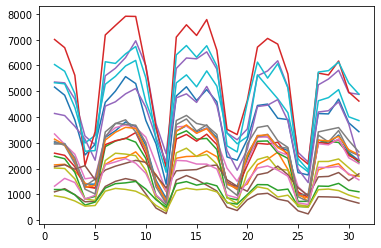

In [129]:
import matplotlib.pyplot as plt

def cyclists_per_day():
  df = split_date_continues()
  df = df.drop(['Hour', 'Weekday'], axis=1)

  result = df.groupby(['Year', 'Month', 'Day']).sum()
  return result.sort_index()

data = cyclists_per_day()
#data = data.index[(2017,8),:]
# no data for Aug 2017
plt_data = data.loc[(2018, 8),:]

plt.plot(plt_data)
plt.show()
# data

#### <div class="alert alert-info">Exercise 22 (best Performer)</div>

We use again the top100 data set from the first week of 1964 i. Here we define "goodness" of the Performer  based on the sum of the weeks on chart of its singles. Return a DataFrame of the singles by the best Performer (a subset of rows of the original DataFrame). Do this with function `best_Performer`.

<hr/>

## Time series

If a measurement is made at certain points in time, the resulting values with their measurement times is called a time series. In Pandas a Series whose index consists of dates/times is a time series.

Let's make a copy of the DataFrame that we can mess with:

In [130]:
wh2 = wh3.copy()
wh2.columns

Index(['Year', 'Month', 'Day', 'Time', 'Time zone', 'Precipitation', 'Snow',
       'Temperature'],
      dtype='object')

The column names `Year`, `Month`, and `Day` are now in appropriate form for the `to_datetime` function. It can convert these fields into a timestamp series, which we will add to the DataFrame.

In [131]:
wh2["Date"] = pd.to_datetime(wh2[["Year", "Month", "Day"]])
wh2.head()

,Year,Month,Day,Time,Time zone,Precipitation,Snow,Temperature,Date
0,2017,1,1,00:00,UTC,-1.0,-1.0,0.6,2017-01-01
1,2017,1,2,00:00,UTC,4.4,-1.0,-3.9,2017-01-02
2,2017,1,3,00:00,UTC,6.6,7.0,-6.5,2017-01-03
3,2017,1,4,00:00,UTC,-1.0,13.0,-12.8,2017-01-04
4,2017,1,5,00:00,UTC,-1.0,10.0,-17.8,2017-01-05


We can now drop the useless fields:

In [ ]:
wh2=wh2.drop(columns=["Year", "Month", "Day"])
wh2.head()

The following method call will set the Date field as the index of the DataFrame.

In [ ]:
wh2 = wh2.set_index("Date")
wh2.head()

We can now easily get a set of rows using date slices:

By using the `date_range` function even more complicated sets can be formed. The following gets all the Mondays of Jan:

In [ ]:
More freq offsets https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases

The following finds all the business days (Monday to Friday) of July:

We can get a general idea about the `Temperature` column by plotting it. Note how the index time series is shown nicely on the x-axis.

#### <div class="alert alert-info">Exercise 23 (bicycle timeseries)</div>

Write function `bicycle_timeseries` that

* reads the data set
* cleans it
* turns its `Date` column into (row) DatetimeIndex (that is, to row names) of that DataFrame
* returns the new DataFrame

<hr/>

In [132]:
def bicycle_timeseries():
  df = split_date_continues()
  df['Date'] = pd.to_datetime(df[['Day', 'Month', 'Year', 'Hour']], dayfirst=True)
  df = df.drop(['Day', 'Month', 'Year', 'Hour'], axis=1)
  df = df.set_index('Date')
  return df 
bicycle_timeseries()

,Weekday,point_1,point_2,point_3,point_4,point_5,point_6,point_7,point_8,point_9,point_10,point_11,point_12,point_13,point_14,point_15,point_16,point_17,point_18,point_19,point_20
Date,,,,,,,,,,,,,,,,,,,,,
2017-11-09 23:00:00,Thu,5.0,7.0,2.0,7.0,5.0,0.0,6.0,0.0,5.0,12.0,4.0,0.0,1.0,18.0,12.0,5.0,10.0,3.0,1.0,8
2017-11-10 00:00:00,Fri,2.0,6.0,2.0,3.0,4.0,0.0,2.0,3.0,0.0,6.0,4.0,0.0,2.0,2.0,5.0,2.0,0.0,4.0,0.0,3
2017-11-10 01:00:00,Fri,2.0,1.0,3.0,2.0,6.0,0.0,3.0,0.0,0.0,2.0,2.0,0.0,1.0,2.0,3.0,5.0,2.0,1.0,0.0,3
2017-11-10 02:00:00,Fri,2.0,1.0,1.0,2.0,2.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,1.0,2.0,2.0,2.0,1.0,1.0,0.0,2
2017-11-10 03:00:00,Fri,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,1.0,1.0,1.0,2.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-11-05 03:00:00,Mon,0.0,0.0,1.0,1.0,3.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,2.0,1.0,1.0,0.0,2.0,1.0,0
2018-11-05 04:00:00,Mon,0.0,0.0,5.0,1.0,2.0,1.0,5.0,0.0,1.0,2.0,2.0,1.0,0.0,1.0,1.0,0.0,2.0,4.0,1.0,8
2018-11-05 05:00:00,Mon,5.0,1.0,20.0,8.0,8.0,5.0,7.0,4.0,11.0,12.0,6.0,8.0,2.0,8.0,10.0,6.0,3.0,21.0,8.0,17


#### <div class="alert alert-info">Exercise 24 (commute)</div>

In function `commute` do the following:

Use the function `bicycle_timeseries` to get the bicycle data. Restrict to November 2017, group by the weekday, aggregate by summing. Set the `Weekday` column to numbers from one to seven. Then set the column `Weekday` as the (row) index. Return the resulting DataFrame from the function.

 plot the DataFrame. Xticklabels should be the weekdays. 



<hr/>

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


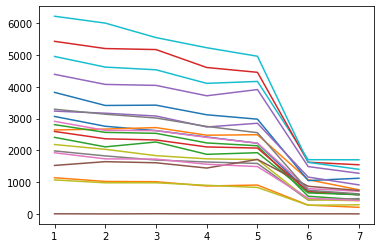

In [143]:
def commute():
  df = bicycle_timeseries()
  df = df['2017-11-01':'2017-11-30']
  df['Weekday'] = df.index.weekday + 1
  return df.groupby('Weekday').sum()

res = commute()
plt.plot(res)
plt.show()

## Summary 
* Operations maintain these indices even when adding or removing rows or columns
* Indices also allow several operations to be combined meaningfully and easily
* You can create DataFrames in several ways:
     * By reading from a csv file
     * Out out two dimensional NumPy array
     * Out of rows
     * Out of columns
* You know how to access rows, columns and individual elements of DataFrames
* You can use the `describe` method to get a quick overview of a DataFrame
* You know how missing values are represented in Series and DataFrames, and you know how to manipulate them
* There are similarities between Python's string methods and the vectorized forms of string operations in Series and DataFrames
* We remember that with NumPy arrays we preferred vectorized operations instead of, for instance, `for` loops. Same goes with Pandas. It may first feel that things are easier to achieve with loops, but after a while vectorized operations will feel natural.

## Additional information

[Pandas cheat sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf) Summary of most important Pandas' functions and methods.



Pandas handles only one dimensional data (Series) and two dimensional data (DataFrame). While you can use [hierarchical indices](http://pandas.pydata.org/pandas-docs/stable/user_guide/advanced.html#hierarchical-indexing-multiindex) to simulate higher dimensional arrays, you should use the [xarray](http://xarray.pydata.org/en/stable/index.html) library, if you need proper higher-dimensional arrays with labels. It is basically a cross between NumPy and Pandas.

